# サポートベクターマシン（SVM）の分離平面の可視化  
この記事では、サポートベクトルマシン（SVM）を用いて、分類を行ったときの、分離のための超平面を可視化することを行います。ここでは、3つの変数を説明変数として用いて、3次元プロットによる可視化を行います。

## モジュールのインポート

In [1]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
%matplotlib notebook

## irisデータセットの読み込み  
ここでは、irisデータセットを用います

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :3]  # 3つの変数のみを用いる
Y = iris.target
# 用いるデータの作成
X = X[np.logical_or(Y==0,Y==1)]
Y = Y[np.logical_or(Y==0,Y==1)]

## SVMの学習  
ここでは、ガウシアンカーネルを用いて学習を行います。せんけい

In [3]:
model = svm.SVC(kernel='rbf',probability=True)

In [4]:
clf = model.fit(X, Y)
y_pred = clf.predict(X)
#print(y_pred)
y_pred2 = clf.predict_proba(X)
#print(y_pred2)

In [5]:
margin = 0
mesh_size = 0.2
x1 = X[:,0]
x2 = X[:,1]
x3 = X[:,2]

x_min, x_max = x1.min() - margin, x1.max() + margin
y_min, y_max = x2.min() - margin, x2.max() + margin
z_min, z_max = x3.min() - margin, x3.max() + margin

xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
zrange = np.arange(z_min, z_max, mesh_size)
x,y,z = np.meshgrid(xrange,yrange,zrange)
x = x.reshape(-1)
y = y.reshape(-1)
z = z.reshape(-1)

<IPython.core.display.Javascript object>


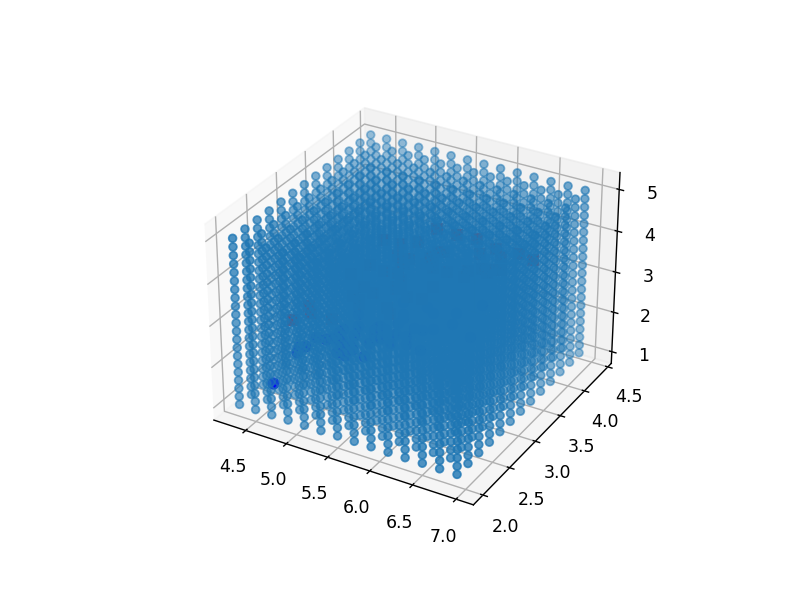

In [6]:
cat = np.vstack([x,y,z])
cat2 =cat.T
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z)

ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
plt.show()

In [7]:
y_pred2 = clf.predict_proba(cat2)

In [8]:
diff = y_pred2[:,0]-y_pred2[:,1]
idx = np.where(np.abs(diff)<0.1)
#print(diff)
xyz = cat2[idx,:]
out = np.squeeze(xyz)

<IPython.core.display.Javascript object>


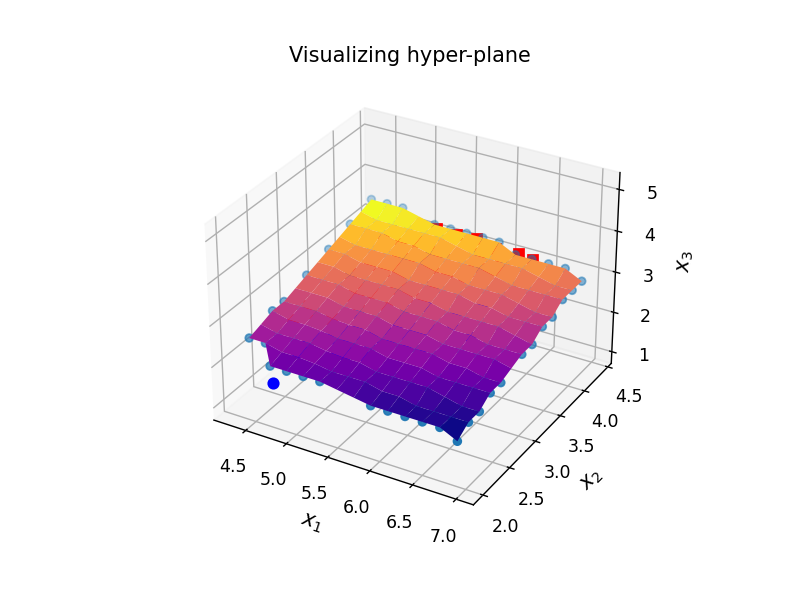

In [15]:
x = out[:,0]
y = out[:,1]
z = out[:,2]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z)
plt.show()
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')

x_new, y_new = np.meshgrid(np.unique(x), np.unique(y))
z_new = griddata((x, y), z, (x_new, y_new))

# これでちゃんと描画できます
ax.plot_surface(x_new, y_new, z_new,cmap='plasma')
ax.set_xlabel(r"$x_1$", fontsize=12)
ax.set_ylabel(r"$x_2$", fontsize=12)
ax.set_zlabel(r"$x_3$", fontsize=12)
ax.set_title("Visualizing hyper-plane", fontsize=12)
plt.show()

https://qiita.com/thtitech/items/4c0777f3825572d7e0eb  
https://qiita.com/kzm4269/items/8ea85f3d90caecef704b